<a href="https://colab.research.google.com/github/IsabellaGarciaS/Biosignals/blob/main/P3_Parte2_G2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head><p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='black'> <center>
       Bioseñales y Sistemas </center></font></h1>
<p3><center><b><font color='black' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>
</font>
<h2><font color='black'> <center>
Practica 3 parte 2  </center></font></h2>
<h3><font color='black'> <center>
Danna Isabella Garcia Saenz - Solanlly Evenedy Montoya Rivera </center></font></h3>
<font  face="Courier New" size="3">
<p1><center> </center></p1></head>

In [ ]:
#montamos el archivo tener acceso a los archivos almacenados en el
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#librerias convencionales
from scipy.fftpack import fft;
import matplotlib.pyplot as plt;
import numpy as np;
import scipy.io as sio;
import matplotlib.pyplot as plt
#import yasa
import os
import scipy.io
import pandas as pd

In [ ]:
#estas lineas de codigo se hacen para copiar y descomprimir los archivos ZIP de control.zip desde la carpeta datos al directorio de trabajo actual
!cp /content/drive/MyDrive/Datos/control.zip .
!unzip control.zip

Archive:  control.zip
 extracting: control/C001R_EP_reposo.mat  
 extracting: control/C002_EP_reposo.mat  
 extracting: control/C004_EP_reposo.mat  
 extracting: control/C005_EP_reposo_Repetido.mat  
 extracting: control/C006_EP_reposo.mat  
 extracting: control/C007_EP_reposo.mat  
 extracting: control/C010_EP_reposo.mat  
 extracting: control/C011_EP_reposo.mat  
 extracting: control/C012_EP_reposo.mat  
 extracting: control/C013_EP_reposo.mat  
 extracting: control/C015_EP_reposo.mat  
 extracting: control/C018_EP_reposo.mat  
 extracting: control/C019_EP_reposo.mat  
 extracting: control/C020_EP_reposo.mat  
 extracting: control/C021_EP_reposo.mat  
 extracting: control/C023_EP_reposo.mat  
 extracting: control/C024_EP_reposo.mat  
 extracting: control/C025_EP_reposo.mat  
 extracting: control/C026_EP_reposo.mat  
 extracting: control/C027_EP_reposo.mat  
 extracting: control/C028_EP_reposo.mat  
 extracting: control/C029_EP_reposo.mat  
 extracting: control/C030_EP_reposo.mat  
 e

In [ ]:
#volvemos a hacer el mismo proceso para copiar y descomprimir los archivos ZIP de parkinson.zip desde la carpeta datos al directorio de trabajo actual
!cp /content/drive/MyDrive/Datos/parkinson.zip .
!unzip parkinson.zip

Archive:  parkinson.zip
 extracting: parkinson/P001_EP_reposo.mat  
 extracting: parkinson/P004_EP_reposo.mat  
 extracting: parkinson/P005_EP_reposo.mat  
 extracting: parkinson/P007_EP_reposo.mat  
 extracting: parkinson/P012_EP_reposo.mat  
 extracting: parkinson/P013_EP_reposo.mat  
 extracting: parkinson/P015_EP_reposo.mat  
 extracting: parkinson/P016_EP_reposo.mat  
 extracting: parkinson/P017_EP_reposo.mat  
 extracting: parkinson/P018_EP_reposo.mat  
 extracting: parkinson/P020_EP_reposo.mat  
 extracting: parkinson/P025_EP_reposo.mat  
 extracting: parkinson/P026_EP_reposo.mat  
 extracting: parkinson/P028_EP_reposo.mat  
 extracting: parkinson/P030_EP_reposo.mat  
 extracting: parkinson/P032_EP_reposo.mat  
 extracting: parkinson/P033_EP_reposo.mat  
 extracting: parkinson/P034_EP_reposo.mat  
 extracting: parkinson/P040_EP_reposo.mat  
 extracting: parkinson/P041_EP_reposo.mat  
 extracting: parkinson/P046_EP_reposo.mat  
 extracting: parkinson/P048_EP_reposo.mat  
 extract

In [ ]:
#imprime el directorio de trabajo actual
import os
directorio_actual=os.getcwd() #devuelve una cadena de texto que contiene la ruta completa del directorio de trabajo actual a la variable directorio_actual
print(directorio_actual)

/content


In [ ]:
#esta parte del codigo se hace para seleccionar las rutas de los archivos de control y parkinson, carga los archivos de control
#y los procesa para obtener una matriz de datos continua para cada sujeto.

archivos_Control=os.listdir(directorio_actual + "/control") #aca seleccionamos las rutas de los pacientes
archivos_Parkinson=os.listdir(directorio_actual + "/parkinson")
print(len(archivos_Control))
print(len(archivos_Parkinson))
#CARGAMOS LOS CONTROLES
for i in range(0,len(archivos_Control)): #recorre la lista de archivos de control
    sujetoi=(directorio_actual + "/control" + "/" + archivos_Control[i]); #obtenemos la ruta del archivo
    data = sio.loadmat(sujetoi); #se carga el archivo
    data = data["data"]; #se extrae la matriz de datos del archivo, la informacion que necesitamos que estaba contenida

    #2 VOLVERLO CONTINUO
    sensores = data.shape[0];
    puntos = data.shape[1];
    epocas = data.shape[2];

    senal_continua = np.reshape(data,(sensores, puntos*epocas), order = 'F'); #aca vamos a organizar los datos
    #se va a imprimir las filas y columnas

36
23


In [ ]:
#Observemos que las señales cargadas sean .mat
archivos_Control[0] # esto es para mirar el primer archivo en la lista de archivos de control


'C027_EP_reposo.mat'

In [ ]:
archivos_Parkinson[0]

'P034_EP_reposo.mat'

In [ ]:
#este codigo lo hacemos para conocer la estructura de datos cargada del archivo, mostraria las claves nombres de las variables dentro del archivo

#ruta de un archivo
path_subjecti_control=(directorio_actual + "/control" + "/" + archivos_Control[0]) #variable con la ruta, con el primer archivo
#1 CARGAR EL ARCHIVO
data_control= sio.loadmat(path_subjecti_control)
#Buscamos la llave para poder llamarla
data_control.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [ ]:
data_control=data_control['data']
data_control.shape

(8, 2000, 142)

In [ ]:
print("Variable python: " + str(type(data_control)));
#características básicas de ndarray
print("Tipo de variable cargada: " + str(data_control.dtype));
print("Dimensiones de los datos cargados: " + str(data_control.shape));
print("Numero de dimensiones: " + str(data_control.ndim));
print("Tamanio: " + str(data_control.size));
print("Tamanio en memoria (bytes): " + str(data_control.nbytes));

Variable python: <class 'numpy.ndarray'>
Tipo de variable cargada: float64
Dimensiones de los datos cargados: (8, 2000, 142)
Numero de dimensiones: 3
Tamanio: 2272000
Tamanio en memoria (bytes): 18176000


In [ ]:
#aca hacemos lo mismo que hace algunas lineas de reorganizar los datos
senal_continua_control= np.reshape(data_control,(data_control.shape[0],data_control.shape[1]*data_control.shape[2]),order='F')

In [ ]:
senal_continua_control.shape

(8, 284000)

Dimensiones de los datos cargados: (8, 284000)


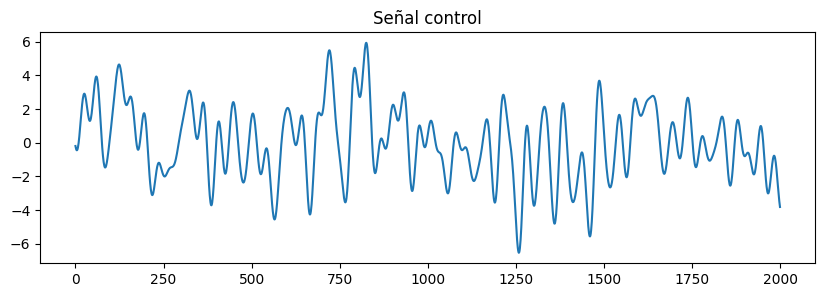

In [ ]:
#aca hacemos una figura que nuestra una porcion de elementos de la matriz señal continua control

print("Dimensiones de los datos cargados: " + str(senal_continua_control.shape));
fig = plt.figure(figsize=(10,3))
plt.plot(senal_continua_control[0,0:2000]) #nosotras escogimos un subconjunto de la matriz para la visualizacion para analizar
plt.title("Señal control")
plt.show()

In [ ]:
#Ahora lo hacemos para los archivos de parkinson
path_subjecti_parkinson=(directorio_actual + "/parkinson" + "/" + archivos_Parkinson[0])
#1 CARGAR EL ARCHIVO
data_parkinson= sio.loadmat(path_subjecti_parkinson)
#Buscamos la llave para poder llamarla
data_parkinson.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [ ]:
data_parkinson=data_parkinson['data']
data_parkinson.shape

(8, 2000, 159)

In [ ]:
print("Variable python: " + str(type(data_parkinson)));
#características básicas de ndarray
print("Tipo de variable cargada: " + str(data_parkinson.dtype));
print("Dimensiones de los datos cargados: " + str(data_parkinson.shape));
print("Numero de dimensiones: " + str(data_parkinson.ndim));
print("Tamanio: " + str(data_parkinson.size));
print("Tamanio en memoria (bytes): " + str(data_parkinson.nbytes));

Variable python: <class 'numpy.ndarray'>
Tipo de variable cargada: float64
Dimensiones de los datos cargados: (8, 2000, 159)
Numero de dimensiones: 3
Tamanio: 2544000
Tamanio en memoria (bytes): 20352000


In [ ]:
senal_continua_parkinson= np.reshape(data_parkinson,(data_parkinson.shape[0],data_parkinson.shape[1]*data_parkinson.shape[2]),order='F') #reorganizamos los datos
senal_continua_parkinson.shape

(8, 318000)

Dimensiones de los datos cargados: (8, 318000)


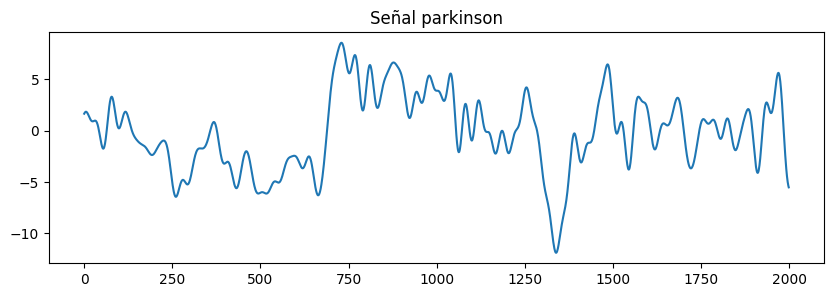

In [ ]:
#hacemos un codigo para visualizar la señal parkinson escogiendo nuevamente un subconjunto de puntos de la matriz para observar un pedazo de la señal

print("Dimensiones de los datos cargados: " + str(senal_continua_parkinson.shape));
fig = plt.figure(figsize=(10,3))
plt.plot(senal_continua_parkinson[0,0:2000])
plt.title("Señal parkinson")
plt.show()

Se cuenta con señales de EEG de dos grupos de personas, un grupo control y un grupo de pacientes con enfermedad  de  Parkinson.  Se  tiene  evidencia  que  la  energía  de  las  señales  de  EEG  puede  conducir  a diferenciar entre señales de pacientes con enfermedad de Parkinson y sanos. Se pide calcular la Energía promedio por grupo poblacional de cada canal.

In [ ]:
#seleccionamos las rutas provenientes de los pacientes control y parkinson
archivos_Control = os.listdir(directorio_actual + "/control")
archivos_Parkinson = os.listdir(directorio_actual + "/parkinson")
print(len(archivos_Control))
print(len(archivos_Parkinson))

#función para calcular la energía de una señal
#calcula la energía de toda la señal y luego la divide por la longitud de la señal para obtener la energía promedio.
def calcular_energia(signal):
    return np.sum(np.square(signal)) / len(signal)

#cargar los controles y calcular la energia promedio por canal
energia_control_por_canal = []
for archivo in archivos_Control:
    sujetoi= directorio_actual + "/control" + "/" + archivo   #ruta de un archivo
    data= sio.loadmat(sujetoi)["data"] #carga el archivo
    sensores, puntos, epocas= data.shape #lo vuelve continuo
    senal_continua= np.reshape(data, (sensores, puntos * epocas), order='F')
    #calcula la energía por canal y promediar
    energia_por_canal= [calcular_energia(senal_continua[i]) for i in range(sensores)]
    energia_control_por_canal.append(energia_por_canal)

energia_control_promedio = np.mean(energia_control_por_canal, axis=0)

# Cargar los pacientes con Parkinson y calcular la energía promedio por canal
energia_parkinson_por_canal= []
for archivo in archivos_Parkinson:
    #ruta de un archivo
    sujetoi = directorio_actual + "/parkinson" + "/" + archivo
    #cargar el archivo
    data= sio.loadmat(sujetoi)["data"]
    #volverlo continuo
    sensores, puntos, epocas= data.shape
    senal_continua= np.reshape(data, (sensores, puntos * epocas), order='F')
    #calcular la energía por canal y promediar
    energia_por_canal= [calcular_energia(senal_continua[i]) for i in range(sensores)]
    energia_parkinson_por_canal.append(energia_por_canal)

energia_parkinson_promedio = np.mean(energia_parkinson_por_canal, axis=0)

#imprime los resultados
print("Energía promedio por canal para el grupo de control:")
print(energia_control_promedio)

print("Energía promedio por canal para el grupo de Parkinson:")
print(energia_parkinson_promedio)


36
23
Energía promedio por canal para el grupo de control:
[11.00733662 11.89345915 12.92293781 11.44159482 11.91382475 41.75919793
 35.17420868 46.26549738]
Energía promedio por canal para el grupo de Parkinson:
[12.17483609 12.69055645 14.73236204 13.00336108 12.89451501 56.29340932
 47.12917112 61.7702947 ]


1. Implemente una función que reciba una señal de múltiples canales y épocas y calcule la Energía de promedio de cada canal.

In [ ]:
def calcular_energia_promedio(signal): #creamos una funcion
    canales, puntos, epocas = signal.shape

    #calcula la energía de cada época
    energias_epoca = np.sum(signal**2, axis=1)
    #calcula la energía promedio de cada canal
    energias_promedio = np.mean(energias_epoca, axis=1)

    return energias_promedio


In [ ]:
#cargar los controles y calcular la energía promedio por canal
#calcula la energía de cada época y luego promedia estas energías por cada canal

energia_control_por_canal = []
for archivo in archivos_Control:
    #ruta de un archivo
    sujetoi= directorio_actual + "/control" + "/" + archivo
    #cargar el archivo
    data= sio.loadmat(sujetoi)["data"]
    #volverlo continuo
    sensores, puntos, epocas = data.shape
    senal_continua= np.reshape(data, (sensores, puntos * epocas), order='F')
    #calcular la energía promedio por canal
    energia_promedio_por_canal= calcular_energia_promedio(data)
    energia_control_por_canal.append(energia_promedio_por_canal)

energia_control_promedio = np.mean(energia_control_por_canal, axis=0)

#cargar los pacientes con Parkinson y calcular la energía promedio por canal
energia_parkinson_por_canal = []
for archivo in archivos_Parkinson:
    #ruta de un archivo
    sujetoi= directorio_actual + "/parkinson" + "/" + archivo
    #cargar el archivo
    data= sio.loadmat(sujetoi)["data"]
    #volverlo continuo
    sensores, puntos, epocas= data.shape
    senal_continua= np.reshape(data, (sensores, puntos * epocas), order='F')
    #calcular la energía promedio por canal
    energia_promedio_por_canal= calcular_energia_promedio(data)
    energia_parkinson_por_canal.append(energia_promedio_por_canal)

energia_parkinson_promedio= np.mean(energia_parkinson_por_canal, axis=0)

#imprimir resultados
print("Energía promedio por canal para el grupo de control:")
print(energia_control_promedio)

print("Energía promedio por canal para el grupo de Parkinson:")
print(energia_parkinson_promedio)


Energía promedio por canal para el grupo de control:
[22014.67324705 23786.91830389 25845.8756222  22883.18964815
 23827.64949006 83518.39586382 70348.41736007 92530.99476897]
Energía promedio por canal para el grupo de Parkinson:
[ 24349.67217286  25381.11289939  29464.72407895  26006.72215167
  25789.03001546 112586.81864282  94258.34224955 123540.58940534]


2. Calcule la  energía de  cada  canal  promediada  por  épocas  para  cada  sujeto,  esto  para  ambos  grupos poblacionales. Guarde esta información en un DataFrame de columnas ‘canal’ y filas ‘#sujeto’ con los valores de energía calculados, un DataFrame para cada grupo poblacional.

In [ ]:
#función para calcular la energía promedio por canal
def calcular_energia_promedio_por_canal(signal):
    energias_promedio= np.mean(np.sum(signal**2, axis=1), axis=1)
    return energias_promedio

#creamos funcion para calcular la energía promedio por epoca para cada sujeto
def calcular_energia_promedio_por_sujeto(archivos, directorio):
    energias_por_sujeto= []
    for archivo in archivos:
        #ruta de un archivo
        sujetoi= directorio + "/" + archivo
        #cargar el archivo
        data= sio.loadmat(sujetoi)["data"]
        #calcular la energía promedio por canal
        energia_promedio_por_canal = calcular_energia_promedio_por_canal(data)
        #guardar las energías promedio por canal en la lista
        energias_por_sujeto.append(energia_promedio_por_canal)
    #convertimos la lista a un data-frame
    df_energias= pd.DataFrame(energias_por_sujeto, columns=[f'Canal_{i+1}' for i in range(len(energias_por_sujeto[0]))])
    return df_energias

#calcula la energía promedio por epoca para cada sujeto en el grupo de control
df_control_energias= calcular_energia_promedio_por_sujeto(archivos_Control, directorio_actual + "/control")

#calcula la energía promedio por epoca para cada sujeto en el grupo de parkinson
df_parkinson_energias= calcular_energia_promedio_por_sujeto(archivos_Parkinson, directorio_actual + "/parkinson")

#imprimir
print("Energías promedio por canal para el grupo de control:")
print(df_control_energias)

print("\nEnergías promedio por canal para el grupo de Parkinson:")
print(df_parkinson_energias)


Energías promedio por canal para el grupo de control:
         Canal_1       Canal_2       Canal_3       Canal_4       Canal_5  \
0   47166.556798  55107.798641  52286.884667  34682.656928  30606.119338   
1   15966.402868  17617.810248  20804.937129  19654.400017  16678.982063   
2   10717.179591   8678.364937   2837.929418   4247.197699   7940.801560   
3   27648.962740  30316.594962  37591.351773  25811.252034  27832.063483   
4   31250.507507  24222.776323  28298.111428  25378.777621  33079.452791   
5   16237.836551  12899.899544  12386.284718  12167.858008  19279.941752   
6   21064.909655  17704.075393  18305.622532  22438.444791  22415.119998   
7   27406.189072  21049.882057  45082.411879  49492.678794  40225.257438   
8   54139.262123  49105.618777  53194.129654  57224.244039  56824.702656   
9   13352.558858  12079.042337  12056.752677  13537.102069  13418.269716   
10  34036.502777  35276.242239  37728.034174  30403.012785  32255.024467   
11  14148.673322  18283.999666  28

3. Determine si existe diferencia estadística entre canales de cada grupo de sujetos a través de una prueba t. Compruebe los supuestos necesarios para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t para determinar si existen diferencias entre los canales entre grupos de sujetos. De no cumplirse los requisitos, realice entonces un análisis no paramétrico (prueba Ude Mann-Whitney).  Este  numeral  tiene  como  objetivo  identificar  los  canales  que  entregan información diferencial entre pacientes Sanos y con enfermedad de Parkinson.

Las hipótesis planteadas son:

Ho: No hay diferencia significativa en la energía promedio del canal entre los grupos de sujetos sanos (control) y sujetos con Parkinson.

H: Existe una diferencia significativa en la energía promedio del canal entre los grupos de sujetos sanos (control) y sujetos con Parkinson.

In [ ]:
from scipy.stats import ttest_ind, levene, mannwhitneyu, shapiro

#funcion para verificar la normalidad de una variable
def verificar_normalidad(datos):
    _, p_valor= shapiro(datos)
    return p_valor > 0.05

#funcion para verificar la homogeneidad de varianzas usando la prueba de Levene
def verificar_homocedasticidad(datos1, datos2):
    _, p_valor= levene(datos1, datos2)
    return p_valor > 0.05

#funcion para realizar la prueba t independiente si se cumplen los supuestos
def prueba_t(datos1, datos2):
    _, p_valor= ttest_ind(datos1, datos2)
    return p_valor

#otra funcion para realizar la prueba U de Mann-Whitney si no se cumplen los supuestos
def prueba_mannwhitneyu(datos1, datos2):
    _, p_valor = mannwhitneyu(datos1, datos2)
    return p_valor

#realizamos las pruebas para cada canal
for canal in df_control_energias.columns:
    datos_control= df_control_energias[canal]
    datos_parkinson= df_parkinson_energias[canal]

    #verifica normalidad y homogeneidad de varianzas
    normalidad_control= verificar_normalidad(datos_control)
    normalidad_parkinson= verificar_normalidad(datos_parkinson)
    homocedasticidad= verificar_homocedasticidad(datos_control, datos_parkinson)

    print(f"\nCanal: {canal}")
    print(f"Normalidad en control: {normalidad_control}")
    print(f"Normalidad en Parkinson: {normalidad_parkinson}")
    print(f"Homocedasticidad: {homocedasticidad}")

    #realizamos prueba t o U de Mann-Whitney según los resultados
    if normalidad_control and normalidad_parkinson and homocedasticidad:
        p_valor= prueba_t(datos_control, datos_parkinson)
        if p_valor < 0.05:
            print("Prueba t: Existe diferencia estadística (p < 0.05)")
        else:
            print("Prueba t: No hay diferencia estadística (p >= 0.05)")
    else:
        p_valor= prueba_mannwhitneyu(datos_control, datos_parkinson)
        if p_valor < 0.05:
            print("Prueba U de Mann-Whitney: Existe diferencia estadística (p < 0.05)")
        else:
            print("Prueba U de Mann-Whitney: No hay diferencia estadística (p >= 0.05)")



Canal: Canal_1
Normalidad en control: False
Normalidad en Parkinson: False
Homocedasticidad: True
Prueba U de Mann-Whitney: No hay diferencia estadística (p >= 0.05)

Canal: Canal_2
Normalidad en control: False
Normalidad en Parkinson: False
Homocedasticidad: True
Prueba U de Mann-Whitney: No hay diferencia estadística (p >= 0.05)

Canal: Canal_3
Normalidad en control: False
Normalidad en Parkinson: False
Homocedasticidad: True
Prueba U de Mann-Whitney: No hay diferencia estadística (p >= 0.05)

Canal: Canal_4
Normalidad en control: False
Normalidad en Parkinson: False
Homocedasticidad: True
Prueba U de Mann-Whitney: No hay diferencia estadística (p >= 0.05)

Canal: Canal_5
Normalidad en control: False
Normalidad en Parkinson: False
Homocedasticidad: True
Prueba U de Mann-Whitney: No hay diferencia estadística (p >= 0.05)

Canal: Canal_6
Normalidad en control: False
Normalidad en Parkinson: False
Homocedasticidad: True
Prueba U de Mann-Whitney: No hay diferencia estadística (p >= 0.05

# Análisis:

**Normalidad:** Los datos de ambos grupos (control y Parkinson) para cada canal no siguen una distribución normal. Esto significa que los datos no están distribuidos de manera simétrica alrededor de la media, lo cual es un requisito para realizar una prueba t independiente. Dado que la normalidad no se cumple, no podemos usar la prueba t independiente y necesitamos usar una prueba no paramétrica, como la U de Mann-Whitney.

**Homocedasticidad:** La homogeneidad de varianzas (homocedasticidad) es el supuesto de que las varianzas de las poblaciones de las cuales se extrajeron las muestras son iguales. En este caso, la homocedasticidad es True, lo que significa que las varianzas entre los grupos (control y Parkinson) son aproximadamente iguales. Este es un requisito para realizar la prueba t independiente, pero como no podemos cumplir con el supuesto de normalidad, esta información no se utiliza en el análisis.

**Prueba U de Mann-Whitney**: Dado que los datos no cumplen con el supuesto de normalidad, se utilizó la prueba no paramétrica U de Mann-Whitney para comparar las muestras de los dos grupos (control y Parkinson). El resultado de "No hay diferencia estadística (p >= 0.05)" indica que, según la prueba, no hay suficiente evidencia para rechazar la hipótesis nula de que no hay diferencias significativas entre los grupos para el canal en cuestión.

# **INFORME**

Realizar estudios EEG en pacientes con Parkinson en comparación con individuos sanos es fundamental para mejorar la comprensión de la enfermedad, los estudios pueden identificar biomarcadores específicos en la actividad cerebral de pacientes lo que pueden servir como indicadores de la enfermedad ayudando en la diferenciación entre pacientes con parkinson y controles sanos.
En la primera parte de este informe donde es posible la extraccion de un segmento de señal control y de señal parkinson  para su visualizacion podriamos decir que observando la señal a simple vista se evidenciaron pequeños cambios en la actividad eléctrica cerebral que reflejan la enfermedad, pudimos observar cambios en la amplitud y sincronización de las ondas cerebrales, asi como una especie de disminucion de coherencia o entropia de la señal. De esta manera podriamos decir que se refleja como hay una degeneración de las neuronas en el cerebro lo que altera la actividad  y sincronización electrica de las redes neuronales, manifestándose en cambios en el EEG.

Sin embargo al realizar un estudio estadistico en este informe podemos evidenciar que no hay una variabilidad de los datos muy evidente, la explicacion que podriamos obtener a esto es que la enfermedad de parkinson es neurodegenerativa con una amplia variabilidad en la presentación clínica y en la progresión de los síntomas entre los pacientes, esto puede resultar en superposiciones en los datos de EEG entre pacientes con parkinson y controles sanos, lo que dificulta la distinción clara basada únicamente en los datos

Un estudio más avanzado utilizando métodos de análisis mas preciso o con mas datos debería ser capaz de detectar diferencias en las variabilidades de los datos de EEG entre pacientes con parkinson y pacientes sanos en términos de normalidad, homocedasticidad y promedios diferentes, lo que permitiría una mejor comprensión de las alteraciones en la actividad cerebral asociadas con la enfermedad de parkinson [1]



# Conclusiones

No se encontraron diferencias significativas entre los grupos en términos de energía promedio del canal a pesar de que eran grupos poblacionales diferentes, esto podría deberse a varias razones, como el tamaño de la muestra, la heterogeneidad de la enfermedad de Parkinson, o la falta de sensibilidad de la medida utilizada, es por esto que se sugiere realizar estudios adicionales con muestras más grandes y métodos de análisis más sensibles para evaluar la actividad cerebral en pacientes con Parkinson para compararlos con mayor precisión con un grupo control.

Los resultados obtenidos resaltan la importancia de utilizar enfoques multidisciplinarios que integren la neurociencia y la estadística para comprender mejor las características neurofisiológicas de la enfermedad de Parkinson y desarrollar nuevas estrategias de diagnóstico y tratamiento.

En el presente trabajo, se demuestra la aplicabilidad de técnicas estadísticas para analizar señales biomédicas como el EEG y su potencial para contribuir al campo de la medicina en el diagnóstico y monitoreo de enfermedades neurológicas como el Parkinson.

#Bibliografia

[1] Detection of Parkinsons diseasefrom EEG signals using discrete wavelet transform, different entropy measures, and machine learning techniques. Majid Aljalal, Saeed A. Aldosari. Nature Scientific Report (2022) Obtenido de: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9800369/pdf/41598_2022_Article_26644.pdf